In [10]:
from Bio import AlignIO
import os
from pathlib import Path
import blosum
from Bio.Align import substitution_matrices
import numpy

In [4]:
alignment_path = Path(".") / "Alignments"

In [136]:
alignments = {x.split(".")[0]: AlignIO.read(alignment_path / x, format="clustal") for x in os.listdir("Alignments")}

In [138]:
def prepare_matrix(name):
    """
    Adapted substitution matrix:
    Maximal number was substracted from all the values, bringing them to negative values with maximum of 0.
    Then the values were reveresed so the least likely change is scored the highest.
    Finally, all the diagonal values (synonimous change) were changed to 0.
    Scaling everything (except indels) to get values between 0 and 1.
    Setting insertion to 2 and deletion to 3.
    Setting - => - to -1.
    """
    matrix = substitution_matrices.load(name)

    matrix = -(matrix - matrix.max())
    numpy.fill_diagonal(matrix, 0)
    # Temporary setting of the indels to 0
    matrix[-1,:] = 0
    matrix[:, -1] = 0
    # Scaling
    matrix = matrix / matrix.max()
    # Setting indels
    matrix[-1,:] = -0.5
    matrix[:, -1] = -1
    matrix[-1, -1] = -1.5
    return matrix

In [159]:
comparisons = {}
matrix = prepare_matrix("BLOSUM90")
for key, alignment in alignments.items():
    species = numpy.array([seq.id.split("|")[1] for seq in alignment])
    if len(species) > 1: # Only compare if there is a comparison to be made
        comparisons[key] = {}
        i_homo = int(numpy.where(species == "Homo_sapiens")[0][0])
        reference_seq = alignment[i_homo]
        for i, (spec, seq) in enumerate(zip(species, alignment)):
            if i != i_homo:
                comparisons[key][spec] = [matrix[x, y] for x, y in zip(str(reference_seq.seq).replace("-", "*"), str(seq.seq).replace("-", "*"))]

In [166]:
comparisons

{'GABRA1': {'Pan_paniscus': [-1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   -1.5,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   -1.5,
   -1.5,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   

In [190]:
from matplotlib import pyplot
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")
matplotlib.rcParams["figure.figsize"] = (30, 30)

In [180]:
def dict_to_plot(data, title="", ticks=True, colors=dict()):
    """
    Function for plotting line-plots from a dictionary containing all the traces to be plotted.
    Argument ticks defines if the x-axis ticks should be plotted.
    """
    fig, ax = pyplot.subplots()
    ax.set_facecolor("white")
    
    for i, (key, data_series) in enumerate(data.items()):
        data_series = [x+(i*0.01) for x in data_series] # Adding a shift between the traces
        pyplot.plot(data_series, label=key, color=colors[key])
    leg = ax.legend(loc="upper center",
                    ncol=len(data.keys()),
                    bbox_to_anchor=(0.5, 1.2))
    pyplot.hlines(-0.3, xmin=0, xmax=len(data[key]), colors="black", linestyles="solid")

    pyplot.yticks(ticks=(-1.5, -1, -0.5, 0, 1))
    ax.set_yticklabels(("Both gap", "Insertion", "Deletion", 0, 1))
    
    pyplot.tick_params(
        axis="x",
        which="both",
        bottom=ticks,
        top=False,
        labelbottom=ticks
    )
    pyplot.title(title)

In [213]:
def dict_to_plot(data, title="", ticks=True, colors=dict()):
    """
    Function for plotting line-plots from a dictionary containing all the traces to be plotted.
    Argument ticks defines if the x-axis ticks should be plotted.
    """
    fig, axs = pyplot.subplots(len(data.keys()), 1)
    
    legends = {}

    for ax, (subtitle, subdata) in zip(axs, data.items()):
        ax.set_facecolor("white")
        for i, (key, data_series) in enumerate(subdata.items()):
            data_series = [x+(i*0.01) for x in data_series] # Adding a shift between the traces
            legends[key] = ax.plot(data_series, label=key, color=colors[key])[0]
        """leg = ax.legend(loc="upper center",
                        ncol=len(data.keys()),
                        bbox_to_anchor=(0.5, 1.2))"""
        ax.hlines(-0.3, xmin=0, xmax=len(subdata[key]), colors="black", linestyles="solid")
        ax.set_title(subtitle)

        ax.set_yticks(ticks=(-1.5, -1, -0.5, 0, 1))
        ax.set_yticklabels(("Both gap", "Insertion", "Deletion", 0, 1))

        ax.tick_params(
        axis="x",
        which="both",
        bottom=ticks,
        top=False,
        labelbottom=ticks
        )
    
    leg = fig.legend(legends.values(), legends.keys(), ncol=len(legends.keys()), loc="upper center", bbox_to_anchor=(0.5, 0.1))

    pyplot.title(title)

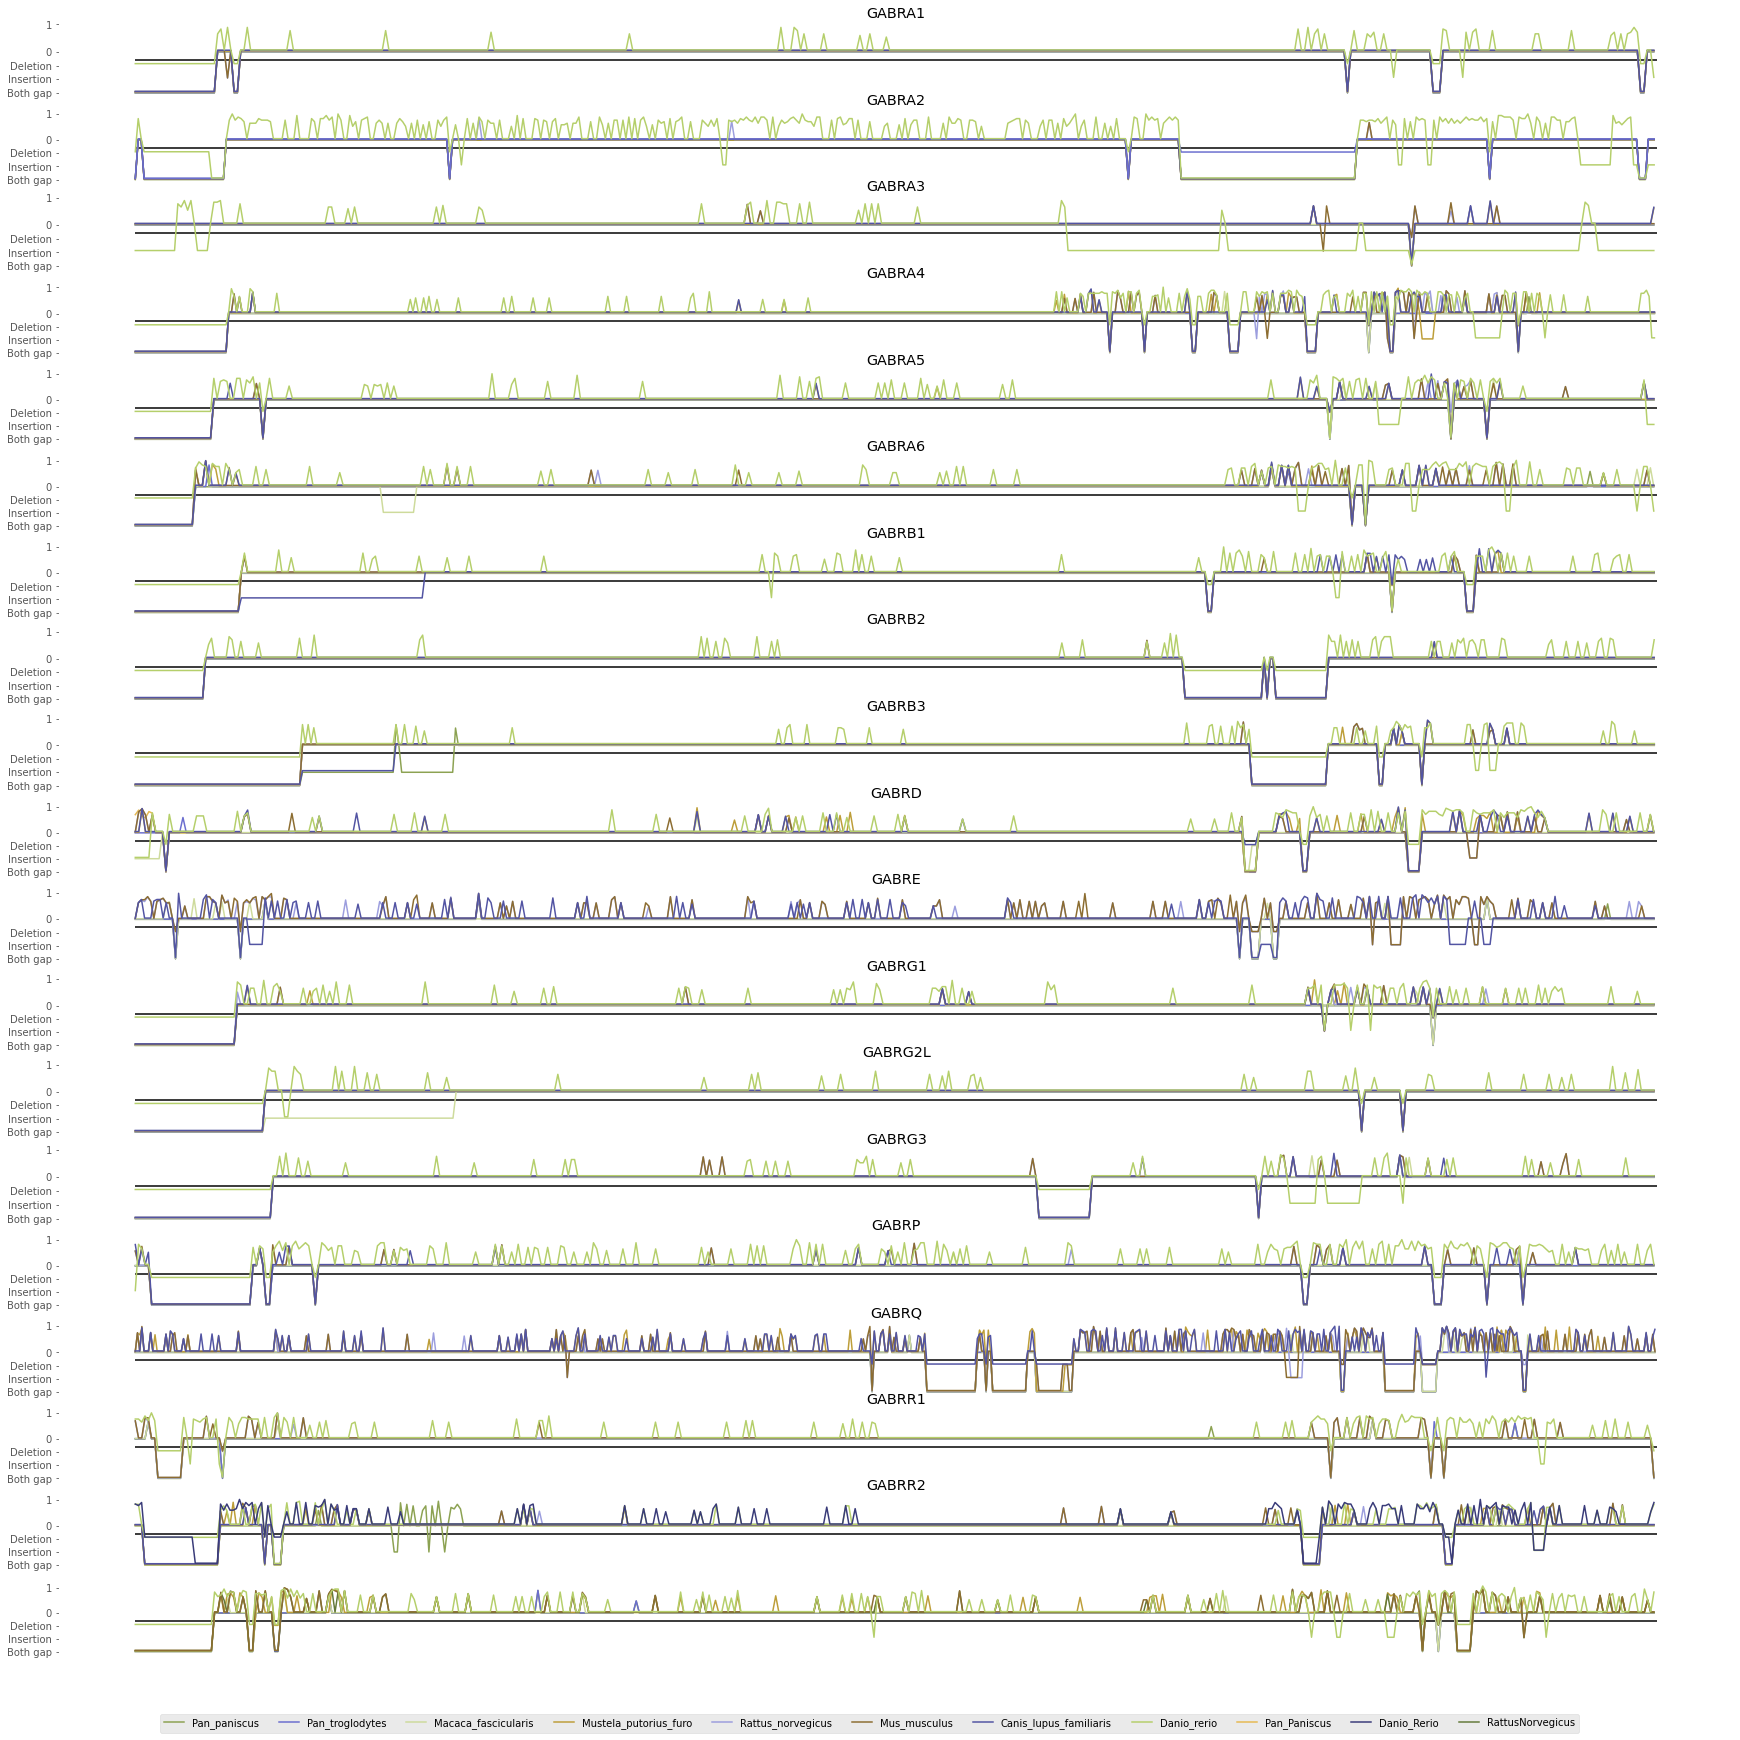

In [214]:
color_names = set(y for x in comparisons.values() for y in x.keys())
cmap = pyplot.get_cmap("tab20b")
colors = {name: color for name, color in zip(color_names, numpy.apply_along_axis(matplotlib.colors.rgb2hex, 1, cmap(numpy.arange(len(color_names)))))}

dict_to_plot(comparisons, ticks=False, colors=colors)

In [133]:
"""
Adapted PAM30 substitution matrix:
Maximal number was substracted from all the values, bringing them to negative values with maximum of 0.
Then the values were reveresed so the least likely change is scored the highest.
Finally, all the diagonal values (synonimous change) were changed to 0.
Scaling everything (except indels) to get values between 0 and 1.
Setting insertion to 2 and deletion to 3.
Setting - => - to -1.
"""
matrix = substitution_matrices.load("PAM30")

matrix = -(matrix - matrix.max())
numpy.fill_diagonal(matrix, 0)
# Temporary setting of the indels to 0
matrix[-1,:] = 0
matrix[:, -1] = 0
# Scaling
matrix = matrix / matrix.max()
# Setting indels
matrix[-1,:] = -0.5
matrix[:, -1] = -1
matrix[-1, -1] = -1.5

In [134]:
comparisons = {}
reference_seq = alignments["GABRA1"][0]
for seq in alignments["GABRA1"]:
    comparisons[seq.id] = [matrix[x, y] for x, y in zip(str(reference_seq.seq).replace("-", "*"), str(seq.seq).replace("-", "*"))]

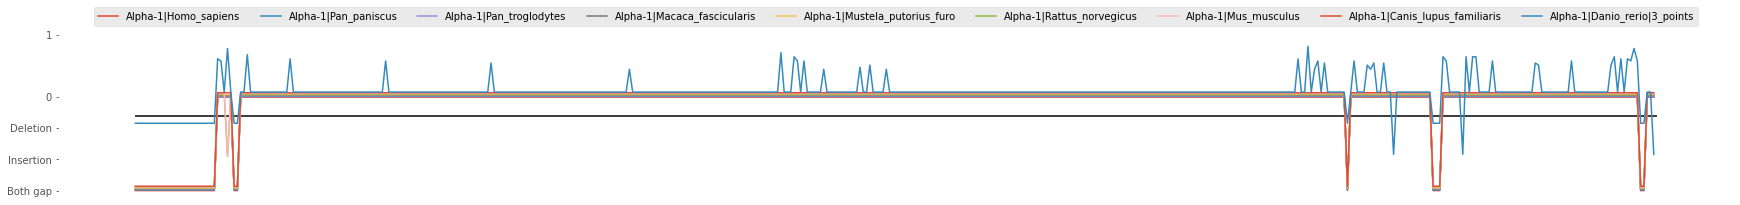

In [135]:
dict_to_plot(comparisons, ticks=False)